<a href="https://colab.research.google.com/github/shoorik04/sales-analysis/blob/main/sales-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this analysis, I examined sales data to identify key trends and insights. Based on the results, the best-selling product is "Canon imageCLASS 2200 Advanced Copier", which generated the highest total revenue.

Additionally, the region with the highest sales is West, indicating strong demand in that area. The month with the highest sales was November in 2018, suggesting a possible seasonal trend.

This analysis helps in understanding which products and regions contribute the most to overall sales, which can be valuable for inventory planning, marketing strategies, and business decision-making.

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
file_path = "/content/drive/MyDrive/data files (for analysis)/train.csv"

In [28]:
from os import replace
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(file_path)

df.head()
# df.info()

# df.describe()

# df.drop(columns=['Postal Code'], inplace=True)

# df.isnull().sum()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [29]:
total_sales = df['Sales'].sum()

print("Total Sales:", total_sales)

Total Sales: 2261536.7827000003


In [30]:
# 5 ყველაზე გაყიდვადი პროდუქტი
df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head()


,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479


<ipython-input-31-a455426e2b6a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")


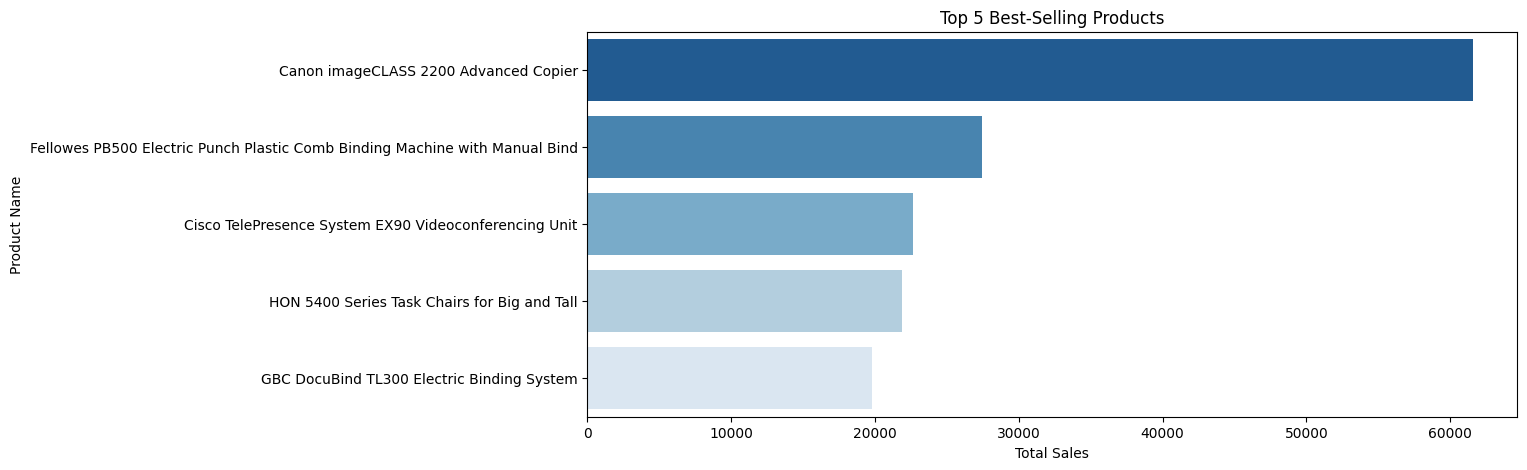

In [31]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.title("Top 5 Best-Selling Products")
plt.show()

In [32]:
df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

,Sales
Region,
West,710219.6845
East,669518.7260
Central,492646.9132
South,389151.4590


<ipython-input-33-0585e8698cd7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")


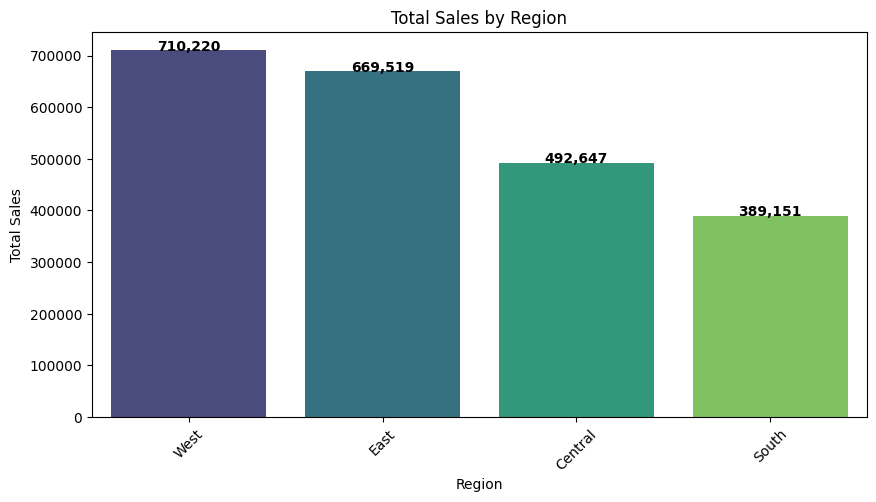

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group sales by region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Display exact values
# print("Total Sales by Region:\n", region_sales)

# Create bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")

# Add exact values on bars
for index, value in enumerate(region_sales.values):
    plt.text(index, value + 100, f'{value:,.0f}', ha='center', fontsize=10, fontweight='bold')

# Customize chart
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Total Sales by Region")
plt.xticks(rotation=45)
plt.show()


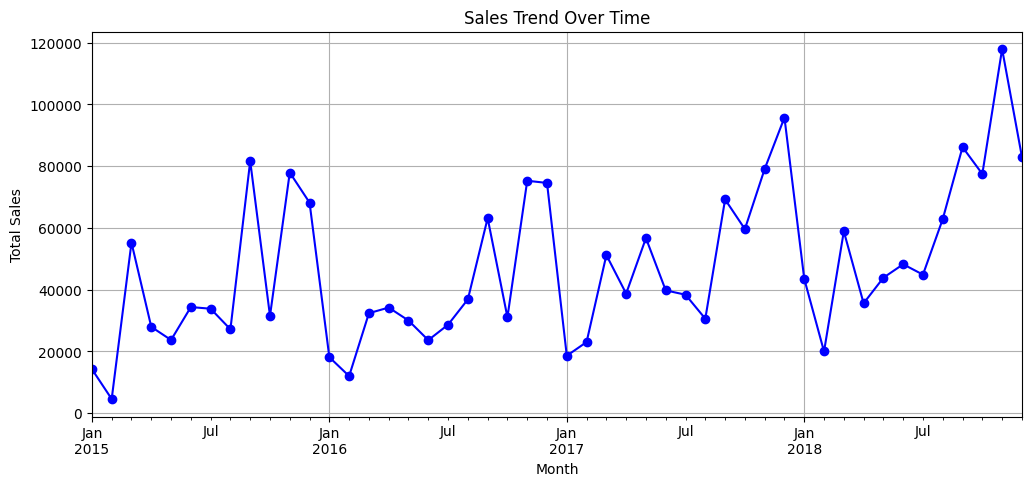

In [35]:
df["order_date"] = pd.to_datetime(df["Order Date"], format='%d/%m/%Y')
monthly_sales = df.groupby(df["order_date"].dt.to_period("M"))["Sales"].sum()
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.grid()
plt.show()

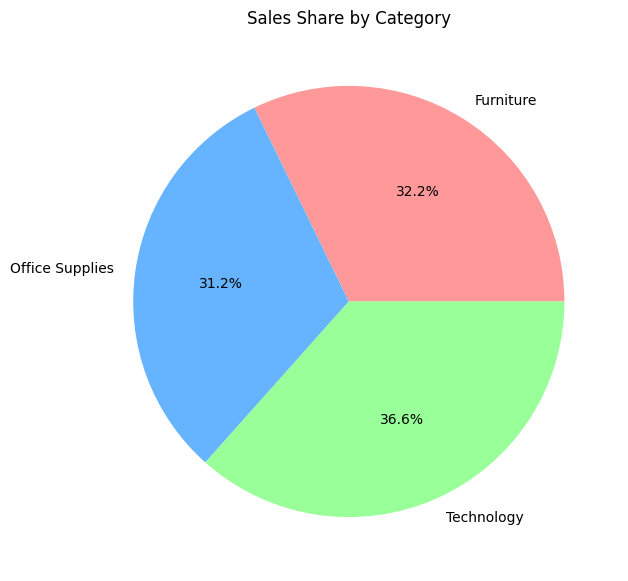

In [36]:
category_sales = df.groupby("Category")["Sales"].sum()

# Plot
plt.figure(figsize=(7, 7))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Sales Share by Category")
plt.show()